In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure
%matplotlib inline

In [2]:
def load_data():
    data = [l.strip() for l in open('data/z_scores.csv') if l.strip()]
    features = [list(map(float, x.split(',')[:-1])) for x in data]
    labels = [x.split(',')[-1] for x in data]
    return features, labels

In [3]:
class Cluster(object):
    """Object that represent
    the Clusters & Centroids and 
    related methods"""
    
    def __init__(self, vectors):
        """The vectors of the cluster"""
        
        self.vectors = vectors
        self.centroid = self.calcCentroid()
        
    """def __repr__(self):
        
        return str((self.vectors, self.centroid))"""
    
    def calcCentroid(self):
        """Calculate the center point"""
        size = len(self.vectors)
        # zip all features together
        zipped = zip(*self.vectors)
        # Calculate the mean for each feature/column
        centroid = [math.fsum(column)/size for column in zipped]
        
        return centroid
    
    def updateCentroid(self, vectors):
        """Returns how much the centroids moved
        from his previous place and update the new centroid"""
        previous_centroid = self.centroid
        self.vectors = vectors
        self.centroid = self.calcCentroid()
        shift = distance(previous_centroid, self.centroid)
        
        return shift

In [4]:
def distance(x, y):
    """Euclidan distance between two vectors"""
    dist = [pow((x-y), 2) for x, y in zip(x,y)]
    dist = math.sqrt(sum(dist))
    
    return dist

In [5]:
def kmeans(vectors, k, converaged):
    
    """Select random k vectors as initial centroids"""
    init_vectors = random.sample(vectors, k)
    
    """Create k clusters using init_vectors"""
    clusters = [Cluster([v]) for v in init_vectors]
    
    """How many interations until centroids stabilize"""
    iteration = 0
    
    while True:
        
        # Vector (list) which holds all the cluster points in the given cluster
        cluster_points = [[] for c in clusters]
        n_cluster = len(clusters)
        
        # Start the iteration
        iteration += 1
        
        # For every feature from the vectors (dataset)
        for v in vectors:
            # Distance between the first feature and the centroid of the 1st cluster
            distance_ = distance(v, clusters[0].centroid)
            cluster_no = 0
            
            for i in range(1, n_cluster):
                dist = distance(v, clusters[i].centroid)
                # Find the smallest distance from each remaining centroids
                if dist < distance_:
                    distance_ = dist
                    cluster_no = i
            
            cluster_points[cluster_no].append(v)
        
        # Initial (biggest) shift
        shift = 0.0
        
        for i in range(n_cluster):
            # Calculate much the centroids moved in the interation
            shift_ = clusters[i].updateCentroid(cluster_points[i]) 
            # Largest Move from all the clusters
            shift = max(shift, shift_)
            
        if shift_ < converaged:
            print("Convereged after " + repr(iteration) + " iterations")
            break
        
    
    return clusters

In [6]:
features, labels = load_data()

In [7]:
converaged = 0.02

In [8]:
clusters = kmeans(features, 3, converaged)

Convereged after 7 iterations


In [9]:
def plot(X, clusters, cluster_num):
    centroids = []
    for i in range(0,cluster_num):
        centroids.append(clusters[i].centroid)
    
    np_centroids = np.asarray(centroids)
    
    color = ["g", "r", "b"]
    
    fig = figure()
    ax = fig.gca(projection='3d')
    for i in range(len(X)):
        ax.scatter(X[i][0], X[i][1], X[i][2], c=color)
    
    ax.scatter(np_centroids[:, 0],np_centroids[:, 1],
               np_centroids[:, 2], marker = "x", s=150,
               linewidths = 5, zorder = 100, c=color
              )

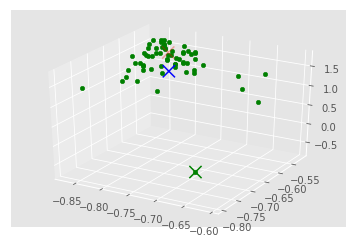

In [10]:
plot(features, clusters, 3)